In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [3]:
# set configuration
sample_size = 100
nr_sample_sets = 20
num_steps = 10
max_t = 20
t = np.linspace(0.001, max_t, num_steps)
sample_config = [sample_size, nr_sample_sets]

# classificatiom
n_folds = 5
test_size = 0.2

## Figures for report

In [23]:
max_t = np.pi*2
num_steps= 100
t = np.linspace(0.001, max_t, num_steps)

In [24]:
from scipy.stats import uniform
r = uniform.rvs(size=100)
ecf = np.mean(np.exp(1j * np.outer(r, t).astype(float)), axis=0)
ecf_r = np.real(ecf)
ecf_i = np.imag(ecf)

(-1.1, 1.1)

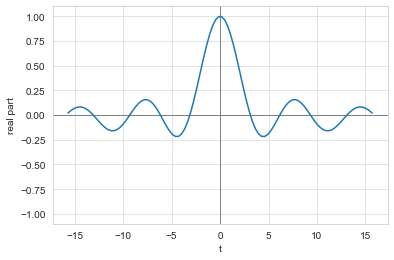

In [21]:
fig, ax = plt.subplots()
sns.set_style('whitegrid',{'grid.color':'#DDDDDD'})
ax.axhline(0, color='grey', linewidth=1)
ax.axvline(0, color='grey', linewidth=1)
ax.plot(t, ecf_r)
ax.set_xlabel('t')
ax.set_ylabel('real part')
ax.set_ylim(-1.1,1.1)

(-1.1, 1.1)

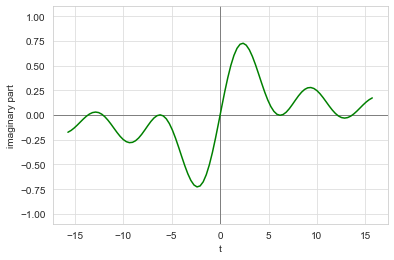

In [22]:
fig, ax = plt.subplots()
sns.set_style('whitegrid',{'grid.color':'#DDDDDD'})
ax.axhline(0, color='grey', linewidth=1)
ax.axvline(0, color='grey', linewidth=1)
ax.plot(t, ecf_i, color ='green')
ax.set_xlabel('t')
ax.set_ylabel('imaginary part')
ax.set_ylim(-1.1,1.1)

(-0.3, 1.1)

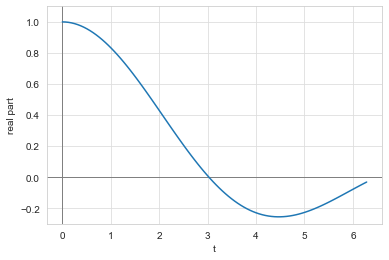

In [27]:
fig, ax = plt.subplots()
sns.set_style('whitegrid',{'grid.color':'#DDDDDD'})
ax.axhline(0, color='grey', linewidth=1)
ax.axvline(0, color='grey', linewidth=1)
ax.plot(t, ecf_r)
ax.set_xlabel('t')
ax.set_ylabel('real part')
ax.set_ylim(-0.3,1.1)

(-0.3, 1.1)

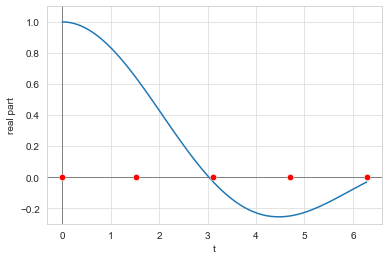

In [25]:
fig, ax = plt.subplots()
sns.set_style('whitegrid',{'grid.color':'#DDDDDD'})
ax.axhline(0, color='grey', linewidth=1)
ax.axvline(0, color='grey', linewidth=1)
sns.scatterplot(x=[t[0]], y=0, color='red', s=40, zorder=10)
sns.scatterplot(x=[t[24]], y=0, color='red', s=40, zorder=10)
sns.scatterplot(x=[t[49]], y=0, color='red', s=40, zorder=10)
sns.scatterplot(x=[t[74]], y=0, color='red', s=40, zorder=10)
sns.scatterplot(x=[t[-1]], y=0, color='red', s=40, zorder=10)
ax.plot(t, ecf_r)
ax.set_xlabel('t')
ax.set_ylabel('real part')
ax.set_ylim(-0.3,1.1)

(-0.3, 1.1)

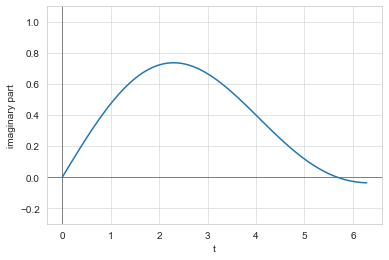

In [28]:
fig, ax = plt.subplots()
sns.set_style('whitegrid',{'grid.color':'#DDDDDD'})
ax.axhline(0, color='grey', linewidth=1)
ax.axvline(0, color='grey', linewidth=1)
ax.plot(t, ecf_i)
ax.set_xlabel('t')
ax.set_ylabel('imaginary part')
ax.set_ylim(-0.3,1.1)

(-0.3, 1.1)

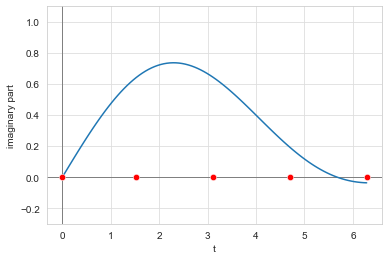

In [26]:
fig, ax = plt.subplots()
sns.set_style('whitegrid',{'grid.color':'#DDDDDD'})
ax.axhline(0, color='grey', linewidth=1)
ax.axvline(0, color='grey', linewidth=1)
sns.scatterplot(x=[t[0]], y=0, color='red', s=40, zorder=10)
sns.scatterplot(x=[t[24]], y=0, color='red', s=40, zorder=10)
sns.scatterplot(x=[t[49]], y=0, color='red', s=40, zorder=10)
sns.scatterplot(x=[t[74]], y=0, color='red', s=40, zorder=10)
sns.scatterplot(x=[t[-1]], y=0, color='red', s=40, zorder=10)
ax.plot(t, ecf_i)
ax.set_xlabel('t')
ax.set_ylabel('imaginary part')
ax.set_ylim(-0.3,1.1)

### Bounded distributions

In [4]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample_sets, sample_size)

In [5]:
ecf_df = dem.get_ecf(bounded_samples, t)
ecf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,1.0,0.665262,0.170235,0.038244,0.049745,0.056456,0.137748,0.147752,0.058854,0.043789,...,0.554453,0.530604,0.292958,0.199883,0.127294,0.108901,0.201213,0.218751,0.178462,beta_1_2
1,1.0,0.667105,0.147008,0.041247,0.168057,0.128650,-0.009537,-0.072399,-0.112084,-0.131783,...,0.562540,0.536365,0.241734,0.201232,0.314480,0.304341,0.226741,0.165312,0.059792,beta_1_2
2,1.0,0.698349,0.209232,-0.001834,-0.056401,-0.118574,-0.159251,-0.143231,-0.036486,0.083416,...,0.559122,0.615079,0.427569,0.321872,0.247908,0.145592,0.025786,-0.054824,-0.000080,beta_1_2


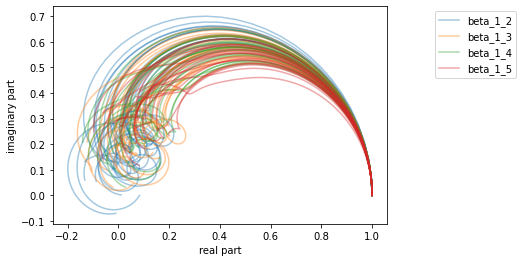

In [22]:
dem.get_ecf_plot(ecf_df,t)

In [105]:
def plot_cv_ecf(clf_result):
    sample_size_list = clf_result['sample_size'].unique()
    clf_result['nr_features'] = clf_result['nr_steps'] + 1
    
    for i in (clf_result['max_t'].unique()):
        fig, ax = plt.subplots()
        sns.set_style('whitegrid',{'grid.color':'#DDDDDD'})
        for j in range(len(sample_size_list)):
            data = clf_result.loc[(clf_result['max_t']==i) & (clf_result['sample_size']==sample_size_list[j])]
            plt.plot(data['nr_features'], data['mean'], label=sample_size_list[j])
            plt.fill_between(data['nr_features'], data['mean']-data['se'], data['mean']+data['se'], alpha=0.2)
        ax.legend(loc='lower left', ncol=3, title='Input size')
        ax.xaxis.set_major_locator(plt.MultipleLocator(2))
        ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
        plt.title('for t in [0.001,%i]' %i)
        plt.ylabel('Accuracy')
        plt.xlabel('Number of constructed features')
        #plt.grid(color='#DDDDDD')
        plt.ylim(0,1.1)
        plt.show()

### SVM

In [6]:
cost = [0.01, 0.1, 0.5, 1, 5, 10]
gamma = [0.01, 0.1, 1, 5, 10]

In [7]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = np.arange(2,21)
max_t_list = [np.pi*2]

In [8]:
res = cm.cv_ecf_svm(sample_size_list, max_t_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, cost, gamma)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

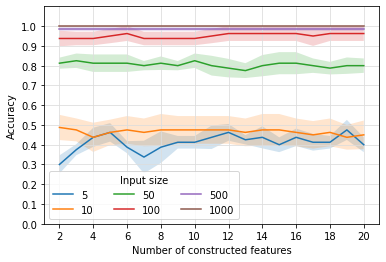

In [9]:
cm.plot_cv_ecf(res)

### Logistic Regression

In [10]:
C = [0.01, 0.25, 1, 5, 10]

In [11]:
res_lr = cm.cv_ecf_lr(sample_size_list, max_t_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, C)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

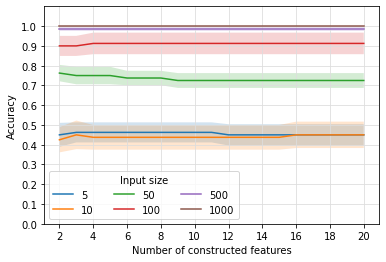

In [12]:
cm.plot_cv_ecf(res_lr)

## Varying number of elements

In [13]:
res_flex_svm = cm.cv_ecf_svm(sample_size_list, max_t_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, cost, gamma, flex=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

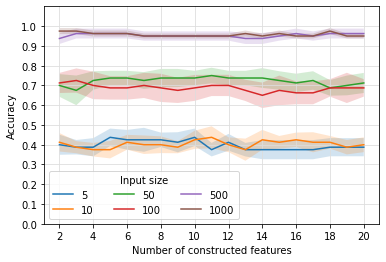

In [14]:
cm.plot_cv_ecf(res_flex_svm)

In [15]:
res_flex_lr = cm.cv_ecf_lr(sample_size_list, max_t_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, C, flex=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

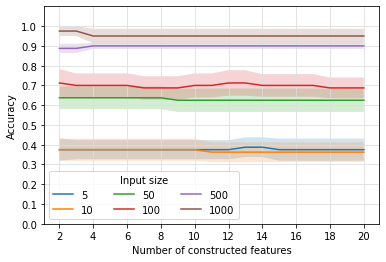

In [16]:
cm.plot_cv_ecf(res_flex_lr)

### Heavytail distributions

In [17]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample_sets, sample_size, transform = False)

In [18]:
ecf_df = dem.get_ecf(heavytail_samples, t)
ecf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,0.999975,0.099821,-0.027632,-0.110365,0.049022,0.087373,0.084757,-0.053364,-0.028742,-0.104377,...,0.356642,0.082038,-0.010607,-0.012524,0.049743,0.174742,0.102982,0.070882,-0.039756,half_cauchy
1,0.999994,0.130303,0.172842,-0.002628,0.062312,-0.012881,0.007929,0.057545,-0.040998,0.082367,...,0.319613,0.050042,0.257488,0.091243,0.231952,0.005176,0.096954,-0.133638,-0.039393,half_cauchy
2,0.999972,0.137419,-0.038831,-0.067608,0.096115,0.094164,-0.039153,0.016132,-0.007406,-0.089543,...,0.370655,0.261509,-0.008612,0.037319,0.127032,0.105122,0.044548,0.136479,0.089694,half_cauchy


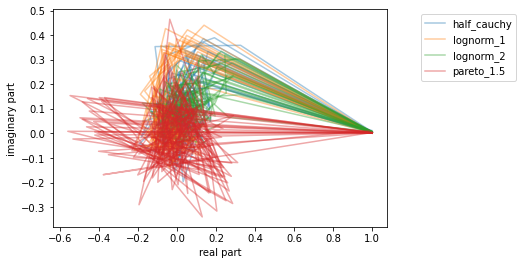

In [19]:
dem.get_ecf_plot(ecf_df, t)

### SVM

In [20]:
res_svm_ht = cm.cv_ecf_svm(sample_size_list, max_t_list, num_steps_list, heavytail_dists, nr_sample_sets, n_folds, test_size, cost, gamma, transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

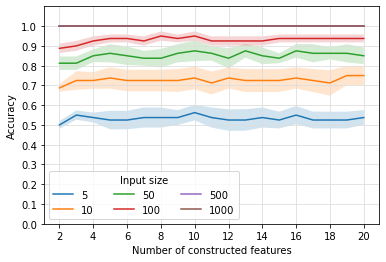

In [21]:
cm.plot_cv_ecf(res_svm_ht)

### Logistic Regression

In [22]:
res_lr_ht = cm.cv_ecf_lr(sample_size_list, max_t_list, num_steps_list, heavytail_dists, nr_sample_sets, n_folds, test_size, C, transform = True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

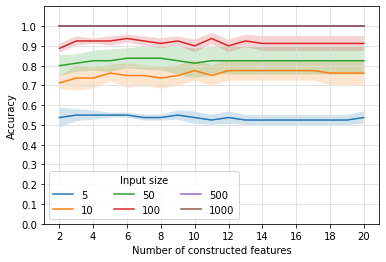

In [23]:
cm.plot_cv_ecf(res_lr_ht)

## Multi modal

In [24]:
nr_modes = 5
nr_sample_sets = 20
nr_mm_dist = 10
sample_size=50

In [25]:
mm_df= dm.get_multimodal_dists(nr_mm_dist, nr_sample_sets, nr_modes, sample_size)
moments_df = dem.get_moments(mm_df, 10)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,label
0,5.761223,6.645678,-2.568828,117.831239,-23.424599,2572.263112,115.222416,59654.666245,16597.723575,1.418465e+06,Dist 01
1,5.852113,6.921009,1.626721,129.156402,133.917069,3060.824675,5411.797587,78803.692573,189788.633994,2.124980e+06,Dist 01
2,5.713216,6.805172,-1.190675,143.624127,-50.828759,3909.705984,-3229.308755,115993.332002,-172915.847933,3.641517e+06,Dist 01


### svm

In [26]:
res_mm_svm = cm.cv_ecf_svm_mm(sample_size_list, max_t_list, num_steps_list, nr_sample_sets, nr_mm_dist, nr_modes, n_folds, test_size, cost, gamma)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

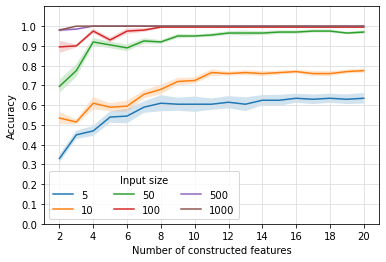

In [27]:
cm.plot_cv_ecf(res_mm_svm)

In [28]:
res_mm_lr = cm.cv_ecf_lr_mm(sample_size_list,max_t_list, num_steps_list, nr_sample_sets, nr_mm_dist, nr_modes, n_folds, test_size, C)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

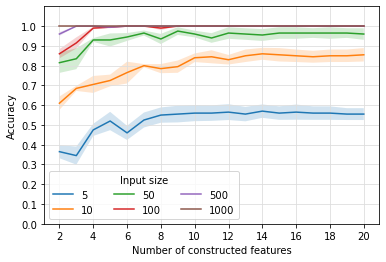

In [29]:
cm.plot_cv_ecf(res_mm_lr)